In [55]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('age_std_suicide_rates_1990-2022.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

Primero exploremos un poco nuestros datos

In [58]:
df.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,Male,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,Female,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,Male,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,Female,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,Male,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


Los datos nulos en population me van a complicar, hay que trabajarlos

In [59]:
mean_population_by_country = df.groupby('CountryName')['Population'].mean()
print(mean_population_by_country)

df['Population'] = df.apply(lambda row: mean_population_by_country[row['CountryName']] if pd.isnull(row['Population']) else row['Population'], axis=1)

CountryName
Albania                                                 3.076418e+06
Antigua and Barbuda                                     8.107300e+04
Argentina                                               3.984762e+07
Armenia                                                 3.068130e+06
Australia                                               2.122238e+07
                                                            ...     
United Kingdom of Great Britain and Northern Ireland    6.138515e+07
United States of America                                2.966550e+08
Uruguay                                                 3.327299e+06
Uzbekistan                                              2.676007e+07
Venezuela (Bolivarian Republic of)                      2.622431e+07
Name: Population, Length: 117, dtype: float64


In [60]:
#columnas_normalize = ['SuicideCount', 'DeathRatePer100K', 'Population', 'GDPPerCapita', 'InflationRate', 'EmploymentPopulationRatio']

#for column in columnas_normalize:
#    min_val = df[column].min()
#    max_val = df[column].max()
#    df[column] = (df[column] - min_val) / (max_val - min_val)

In [61]:
df = df[(df['Year'] != 1990) & (df['Year'] != 2022)] #Notamos que en ambos años existen pocos registros

In [62]:
fig = px.scatter(x=df['EmploymentPopulationRatio'], y=df['SuicideCount'], animation_frame=df['Year'], animation_group=df['CountryName'], hover_name=df['CountryName'], color=df['RegionName'], range_x=[min(df['EmploymentPopulationRatio']), max(df['EmploymentPopulationRatio'])], range_y=[min(df['SuicideCount']), max(df['SuicideCount'])])
fig.update_layout(title='Relación entre empleabilidad y cantidad de suicidios por país a través de los años')
fig.update_xaxes(title_text='Suicidios')
fig.update_yaxes(title_text='Empleabilidad')
fig.show()

In [63]:
df_continent = df.groupby(['RegionName', 'Year']).agg({'SuicideCount': 'sum', 'EmploymentPopulationRatio': 'sum', 'Population' : 'sum'}).reset_index()
df_continent.head()

,RegionName,Year,SuicideCount,EmploymentPopulationRatio,Population
0,Africa,1991,137,108.008,2140532.0
1,Africa,1992,146,107.968,2168882.0
2,Africa,1993,138,107.778,2194748.0
3,Africa,1994,129,107.648,2225692.0
4,Africa,1995,147,107.352,2244914.0


In [64]:
fig = px.scatter(x=df_continent['EmploymentPopulationRatio'], y=df_continent['SuicideCount'], animation_frame=df_continent['Year'], animation_group=df_continent['RegionName'], hover_name=df_continent['RegionName'], color=df_continent['RegionName'], range_x=[min(df_continent['EmploymentPopulationRatio']), max(df_continent['EmploymentPopulationRatio'])], range_y=[min(df_continent['SuicideCount']), max(df_continent['SuicideCount'])])
fig.update_layout(title='Relación entre empleabilidad y cantidad de suicidios por continente a través de los años')
fig.update_xaxes(title_text='Suicidios')
fig.update_yaxes(title_text='Empleabilidad')
fig.show()

In [65]:
fig = px.bar(x=df_continent['SuicideCount'], 
             y=df_continent['RegionName'], 
             animation_frame=df_continent['Year'], 
             animation_group=df_continent['RegionName'], 
             hover_name=df_continent['RegionName'], 
             color=df_continent['RegionName'], 
             orientation='h',
             range_x=[0, df_continent['SuicideCount'].max()])
fig.update_layout(title='Suicidios por continente a través de los años')
fig.update_xaxes(title_text='Suicidios')
fig.update_yaxes(title_text='Continentes')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.show()

In [66]:
sum_suicides_by_country = df.groupby('CountryName')['SuicideCount'].sum().reset_index()

top_10_countries = sum_suicides_by_country.nlargest(10, 'SuicideCount')

df_top_10 = df[df['CountryName'].isin(top_10_countries['CountryName'])]

fig = px.bar(df_top_10, 
             x='SuicideCount', 
             y='CountryName', 
             animation_frame='Year', 
             animation_group='CountryName', 
             hover_name='CountryName', 
             color='CountryName', 
             orientation='h',
             range_x=[0, df_top_10['SuicideCount'].max()])

fig.update_layout(title='Top 10 países con mayor suma total de suicidios a través de los años',
                  xaxis_title='Suicidios',
                  yaxis_title='Países')

fig.update_traces(marker=dict(line=dict(width=1, color='black')))

fig.show()

In [67]:
from dash import Dash, dcc, html, Input, Output

In [68]:
app = Dash(__name__)

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=[external_stylesheets, 'https://stackpath.bootstrapcdn.com/bootswatch/4.5.2/flatly/bootstrap.min.css'])

app.layout = html.Div([
    html.H1('Análisis de Suicidios', style={'textAlign': 'center', 'marginBottom': 30}),
    html.Div([
        html.Label('Seleccionar Opción:'),
        dcc.Dropdown(
            id='dropdown',
            options=[
                {'label': 'RegionName', 'value': 'RegionName'},
                {'label': 'CountryName', 'value': 'CountryName'}
            ],
            value='RegionName',  # Valor predeterminado
            style={'width': '50%','textAlign': 'center', 'marginBottom': 30}  # Estilo del menú desplegable
        )
    ], style={'textAlign': 'center', 'marginBottom': 30}),  # Estilo de la div que contiene el menú desplegable
    dcc.Graph(id='bar-chart')
])

def get_dataframe(option):
    if option == 'RegionName':
        return df_continent
    elif option == 'CountryName':
        return df_top_10

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('dropdown', 'value')]
)

def update_bar_chart(selected_option):
    df_selected = get_dataframe(selected_option)
    
    # Crear el gráfico de barras
    fig = px.bar(df_selected, 
                 x='SuicideCount', 
                 y=selected_option,
                 color=selected_option,
                 animation_frame='Year', 
                 animation_group=selected_option,
                 orientation='h',
                 range_x=[0, df_selected['SuicideCount'].max()],
                 title=f'Suicidios por {selected_option}')
    
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [69]:
df_argentina = df[df['CountryName'] == 'Argentina']
df_argentina.head()

,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
180,CSA,Central and South America,ARG,Argentina,1991,Male,1459,1.031992,9.805622,9.011736,33105763.0,1.900000e+11,5730.723810,1.280000e+11,7740.0,NaN,56.747
181,CSA,Central and South America,ARG,Argentina,1991,Female,502,0.445751,2.957554,2.992192,33105763.0,1.900000e+11,5730.723810,1.280000e+11,7740.0,NaN,56.747
182,CSA,Central and South America,ARG,Argentina,1992,Male,1699,1.176186,11.201349,10.359882,33568285.0,2.290000e+11,6815.329330,2.040000e+11,8540.0,NaN,56.867
183,CSA,Central and South America,ARG,Argentina,1992,Female,510,0.440784,2.963026,2.996263,33568285.0,2.290000e+11,6815.329330,2.040000e+11,8540.0,NaN,56.867
186,CSA,Central and South America,ARG,Argentina,1993,Male,1755,1.191891,11.455239,10.561155,34027240.0,2.370000e+11,6957.417499,2.420000e+11,9390.0,NaN,55.269


In [70]:
import seaborn as sns

In [71]:
df_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 180 to 294
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    85 non-null     object 
 1   RegionName                    85 non-null     object 
 2   CountryCode                   85 non-null     object 
 3   CountryName                   85 non-null     object 
 4   Year                          85 non-null     int64  
 5   Sex                           85 non-null     object 
 6   SuicideCount                  85 non-null     int64  
 7   CauseSpecificDeathPercentage  85 non-null     float64
 8   StdDeathRate                  62 non-null     float64
 9   DeathRatePer100K              62 non-null     float64
 10  Population                    85 non-null     float64
 11  GDP                           85 non-null     float64
 12  GDPPerCapita                  85 non-null     float64
 13  GNI      

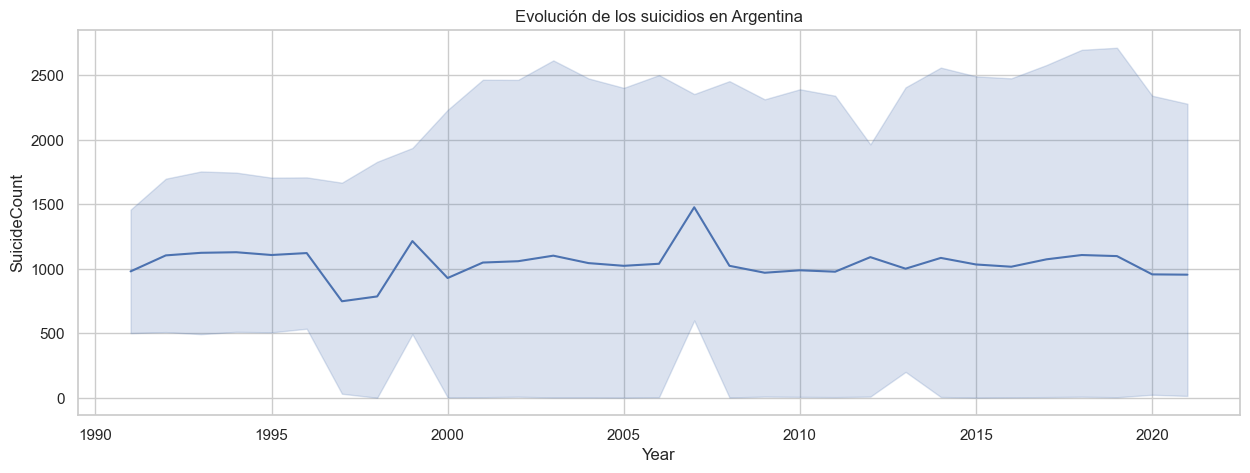

In [72]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
plt.figure(figsize=(15, 5))
sns.lineplot(x=df_argentina['Year'], y=df_argentina['SuicideCount'])
plt.title('Evolución de los suicidios en Argentina')
plt.show()

In [84]:
fig = px.box(data_frame=df_top_10, x='CountryName', y='SuicideCount', boxmode='overlay', color='CountryName')
fig.update_layout(title='Suicidios por pais')
fig.update_xaxes(title_text='Continentes')
fig.update_yaxes(title_text='Suicidios')
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.show()

In [90]:
fig = px.scatter(y=df_top_10['Population'], 
                 x=df_top_10['SuicideCount'], 
                 animation_frame=df_top_10['Year'], 
                 animation_group=df_top_10['CountryName'], 
                 hover_name=df_top_10['CountryName'], 
                 color=df_top_10['CountryName'], 
                 range_y=[min(df_top_10['Population']), max(df_top_10['Population'])], 
                 range_x=[min(df_top_10['SuicideCount']), max(df_top_10['SuicideCount'])],
                 size=df_top_10['SuicideCount'])
fig.update_layout(title='Relación entre población y cantidad de suicidios por país a través de los años')
fig.update_yaxes(title_text='Suicidios')
fig.update_xaxes(title_text='Población')
fig.show()